In [2]:
import rasterio
import rasterio.features
import rasterio.warp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

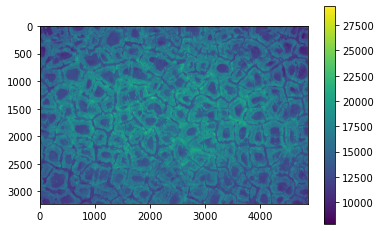

In [3]:
# Reading the raster image (teshekpukCentral RGB image)
im = rasterio.open('09752_014632116_1000.tif')

#Display Band 1
plt.imshow(im.read(1))
plt.colorbar()


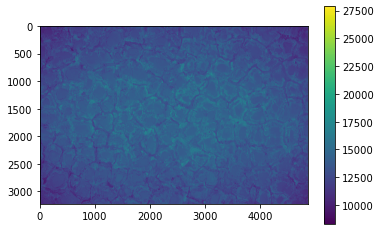

In [19]:
#Display Band 3

plt.imshow(im.read(3))
plt.colorbar()


(array([1.769300e+04, 9.732690e+05, 4.042573e+06, 5.019169e+06,
        4.352940e+06, 1.211847e+06, 9.834700e+04, 4.392000e+03,
        1.900000e+02, 2.800000e+01]),
 array([ 7849. , 10000.3, 12151.6, 14302.9, 16454.2, 18605.5, 20756.8,
        22908.1, 25059.4, 27210.7, 29362. ]),
 <BarContainer object of 10 artists>)

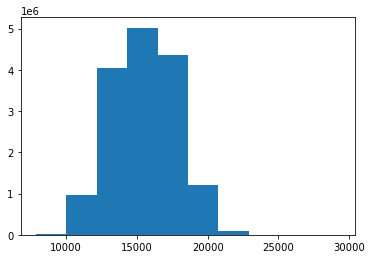

In [21]:
# Plot the histogram to display the distribution of values of pixel values(Band 1)
plt.hist(im.read(1).ravel())

(array([6.761800e+04, 2.509041e+06, 7.395170e+06, 5.021976e+06,
        6.988480e+05, 2.724200e+04, 5.170000e+02, 2.900000e+01,
        5.000000e+00, 2.000000e+00]),
 array([ 8678., 11115., 13552., 15989., 18426., 20863., 23300., 25737.,
        28174., 30611., 33048.]),
 <BarContainer object of 10 artists>)

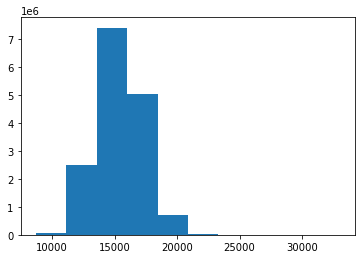

In [16]:
# Plot the histogram to display the distribution of values of pixel values(Band 2)

plt.hist(im.read(2).ravel())

(array([4.869200e+04, 2.199669e+06, 9.137235e+06, 3.997893e+06,
        3.248860e+05, 1.182900e+04, 2.120000e+02, 2.600000e+01,
        5.000000e+00, 1.000000e+00]),
 array([ 8307. , 10264.4, 12221.8, 14179.2, 16136.6, 18094. , 20051.4,
        22008.8, 23966.2, 25923.6, 27881. ]),
 <BarContainer object of 10 artists>)

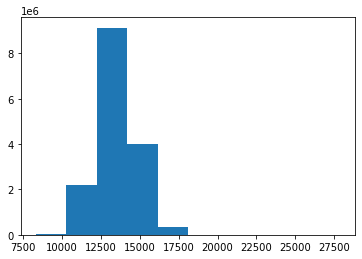

In [5]:
# Plot the histogram to display the distribution of values of pixel values(Band 3)

plt.hist(im.read(3).flatten())

In [11]:
# Invert the diemensions of my bands 
rgb = np.moveaxis(im.read(), 0, -1)

In [51]:
# before and after move-axis
rgb.shape, im.read().shape

((3232, 4864, 3), (3, 3232, 4864))

In [13]:
rgbn=rgb/rgb.max()

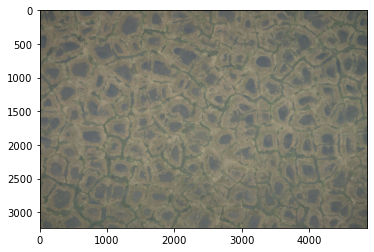

In [14]:
plt.imshow(rgbn)

In [98]:
rgbn.shape

(3232, 4864, 3)

In [99]:
# classify the bands using Kmeans algorithm
X = np.c_[rgbn[:, :, 0].flatten()]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [100]:
kmeans.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [104]:
kmeans.labels_.shape = rgbn[:, :, 0].shape

In [105]:
np.unique(kmeans.labels_/2)

array([0. , 0.5, 1. ])

In [106]:
kmeans.labels_.shape

(3232, 4864)

In [59]:
# save the image was difficult and I could not know how to overcome this error?
with rasterio.open(
        'example.tif', 'w',
        driver='GTiff', width=kmeans.labels_.shape[0], height=kmeans.labels_.shape[1], count=3,
        dtype=kmeans.labels_.dtype) as dst:
    dst.write(kmeans.labels_.astype(rasterio.uint8), 3)

ValueError: Source shape (1, 3232, 4864, 3) is inconsistent with given indexes 1

In [87]:
# This one worked although still not satisfying result
with rasterio.open('example642.tif', 'w',width=kmeans.labels_.shape[1], height=kmeans.labels_.shape[0],count=3,
                   dtype=(kmeans.labels_/2).dtype) as dst:
    dst.write(np.moveaxis(np.flipud(kmeans.labels_)/2, 2, 0).astype(rasterio.float64))

C:\Users\Ahmed\Anaconda3\envs\SDA\lib\site-packages\rasterio\__init__.py:217: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = writer(path, mode, driver=driver,


In [71]:
np.moveaxis(np.flipud(kmeans.labels_), 2, 0).shape

(3, 3232, 4864)

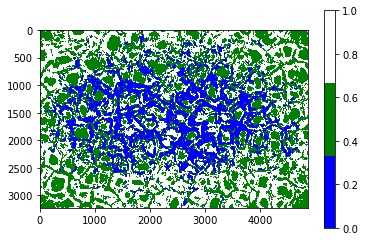

In [107]:
# Plot the classified result although still not for all bands
from matplotlib import colors

cmap = colors.ListedColormap(['blue', 'green', 'white'])

plt.imshow(kmeans.labels_/2, cmap=cmap)
plt.colorbar()
plt.savefig('image.jpg', dpi=300)

In [96]:
np.unique(kmeans.labels_/2)

array([0. , 0.5, 1. ])

(array([17353846.,        0.,        0.,        0.,        0., 18542768.,
               0.,        0.,        0., 11264730.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

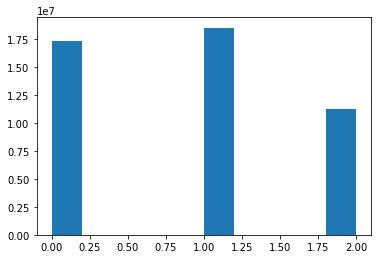

In [82]:
plt.hist(kmeans.labels_.ravel())

#### use the NIR image as it is easy to classify 

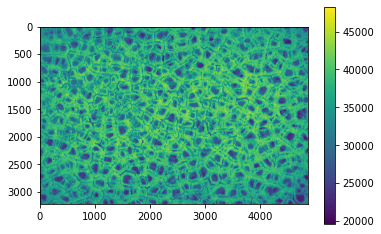

In [8]:
# reading NIR image from same area
im = rasterio.open('11830_020024339_1000.tif')
plt.imshow(im.read(1))
plt.colorbar()

(array([3.550800e+04, 4.908000e+05, 1.010212e+06, 1.535294e+06,
        1.682407e+06, 2.623430e+06, 4.906846e+06, 3.125938e+06,
        3.072530e+05, 2.760000e+03]),
 array([19549. , 22421.5, 25294. , 28166.5, 31039. , 33911.5, 36784. ,
        39656.5, 42529. , 45401.5, 48274. ]),
 <BarContainer object of 10 artists>)

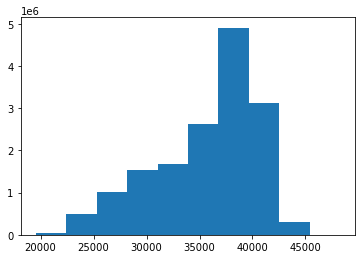

In [9]:
plt.hist(im.read(1).ravel())

In [41]:
im.read(1)

array([[31454, 32475, 31613, ..., 32206, 31958, 33052],
       [31001, 31962, 31781, ..., 31685, 33036, 32801],
       [31792, 31346, 31069, ..., 32362, 32203, 31783],
       ...,
       [28569, 29073, 28131, ..., 28750, 27807, 27706],
       [28045, 27822, 27483, ..., 29362, 27704, 26576],
       [26823, 27717, 28142, ..., 27701, 28035, 28674]], dtype=uint16)

In [49]:
np.c_[im.read(1)].flatten()

(15720448,)

In [50]:
X = np.c_[im.read(1).flatten()]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [51]:
kmeans.labels_.shape, np.c_[im.read(1)].shape

((15720448,), (3232, 4864))

In [52]:
kmeans.fit_predict(X)

array([2, 2, 2, ..., 0, 0, 0])

In [56]:
kmeans.labels_.shape = im.read(1).shape
kmeans.labels_.shape

(3232, 4864)

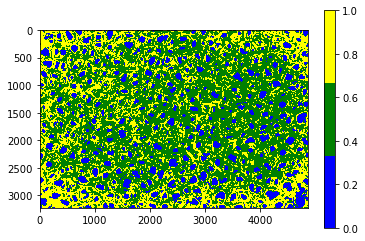

In [58]:
from matplotlib import colors

cmap = colors.ListedColormap(['blue', 'green', 'yellow'])

plt.imshow(kmeans.labels_/2, cmap=cmap)
plt.colorbar()
plt.savefig('image.jpg', dpi=300)

In [109]:
with rasterio.open('11830_020024339_clustered.tif', 'w',width=kmeans.labels_.shape[0], height=kmeans.labels_.shape[1],count=2,
                   dtype=(kmeans.labels_).dtype) as dst:
    dst.write(kmeans.labels_, indexes=1)

In [62]:
kmeans.labels_.shape[0]

3232